**Regional Analysis**

*How does skill demand and job type differ across the UK?*

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [1]:
import pandas as pd
df = pd.read_csv('master_enriched_job_listings_dataset.csv')

*Step 1: Group by Region*

In [2]:
#Check unique regions to understand your geographic scope
print(df['region'].unique())

['East Midlands (England)' 'East of England' 'Isle of Man' 'London'
 'North East (England)' 'North West (England)' 'Northern Ireland' 'Remote'
 'Scotland' 'South East (England)' 'South West (England)' 'Wales'
 'West Midlands (England)' 'Yorkshire and The Humber']


*Step 2: Analyze Prevalence of Job Archetypes by Region*

In [3]:
# Example: Count occurrences of each Job Archetype within each Region
archetype_regional_counts = df.groupby('region')['kmeans_job_archetype'].value_counts().unstack(fill_value=0)

# To get proportions within each region:
archetype_regional_proportions = archetype_regional_counts.apply(lambda x: x / x.sum(), axis=1)

print("\nJob Archetype Counts by Region:")
print(archetype_regional_counts.head())

print("\nJob Archetype Proportions by Region:")
print(archetype_regional_proportions.head())


Job Archetype Counts by Region:
kmeans_job_archetype     AI Strategist  \
region                                   
East Midlands (England)              9   
East of England                     21   
Isle of Man                          0   
London                             120   
North East (England)                 4   

kmeans_job_archetype     BI Visualization Specialist (Power BI Focus)  \
region                                                                  
East Midlands (England)                                            10   
East of England                                                    26   
Isle of Man                                                         0   
London                                                            136   
North East (England)                                                8   

kmeans_job_archetype     Classic Data Scientist (Stats & Modeling Focus)  \
region                                                                     
East Mid

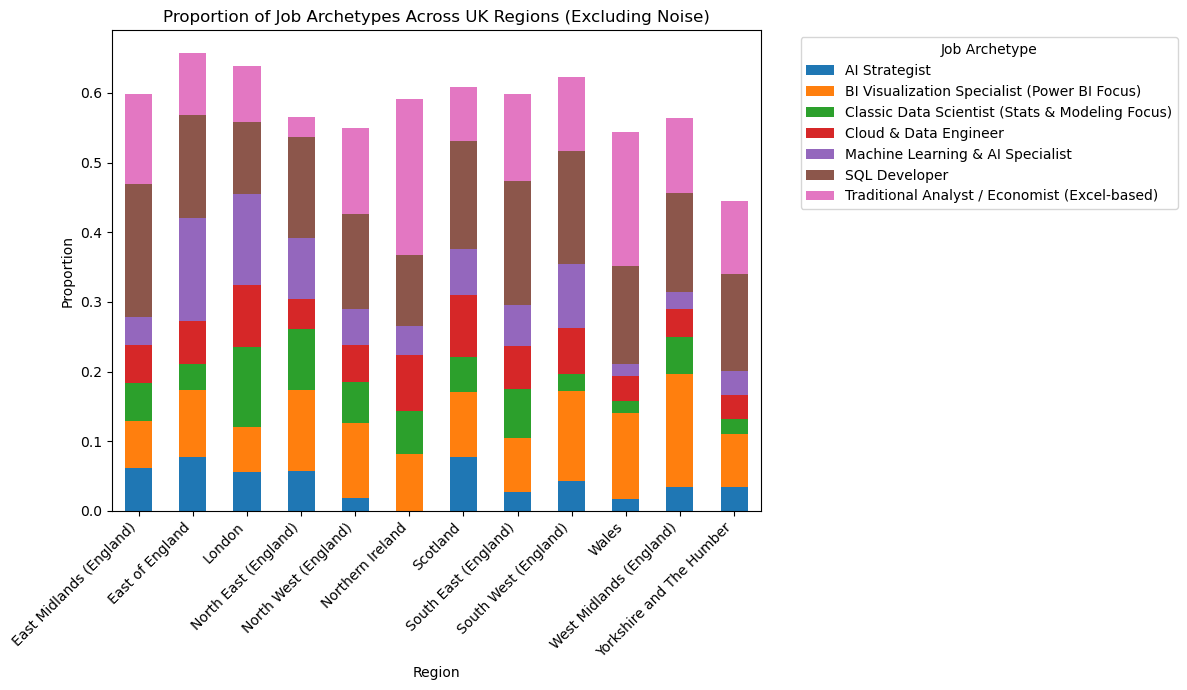

In [6]:
import matplotlib.pyplot as plt

# Filter the DataFrame to remove the 'Isle of Man' region and 'Noise / General Business Role' column
filtered_proportions = archetype_regional_proportions.drop('Isle of Man', axis=0).drop('Remote', axis=0).drop('Noise / General Business Role', axis=1)

# Plot the filtered DataFrame
filtered_proportions.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Proportion of Job Archetypes Across UK Regions (Excluding Noise)')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Archetype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#'Proportion of Job Archetypes Across UK Regions (Excluding Noise)'

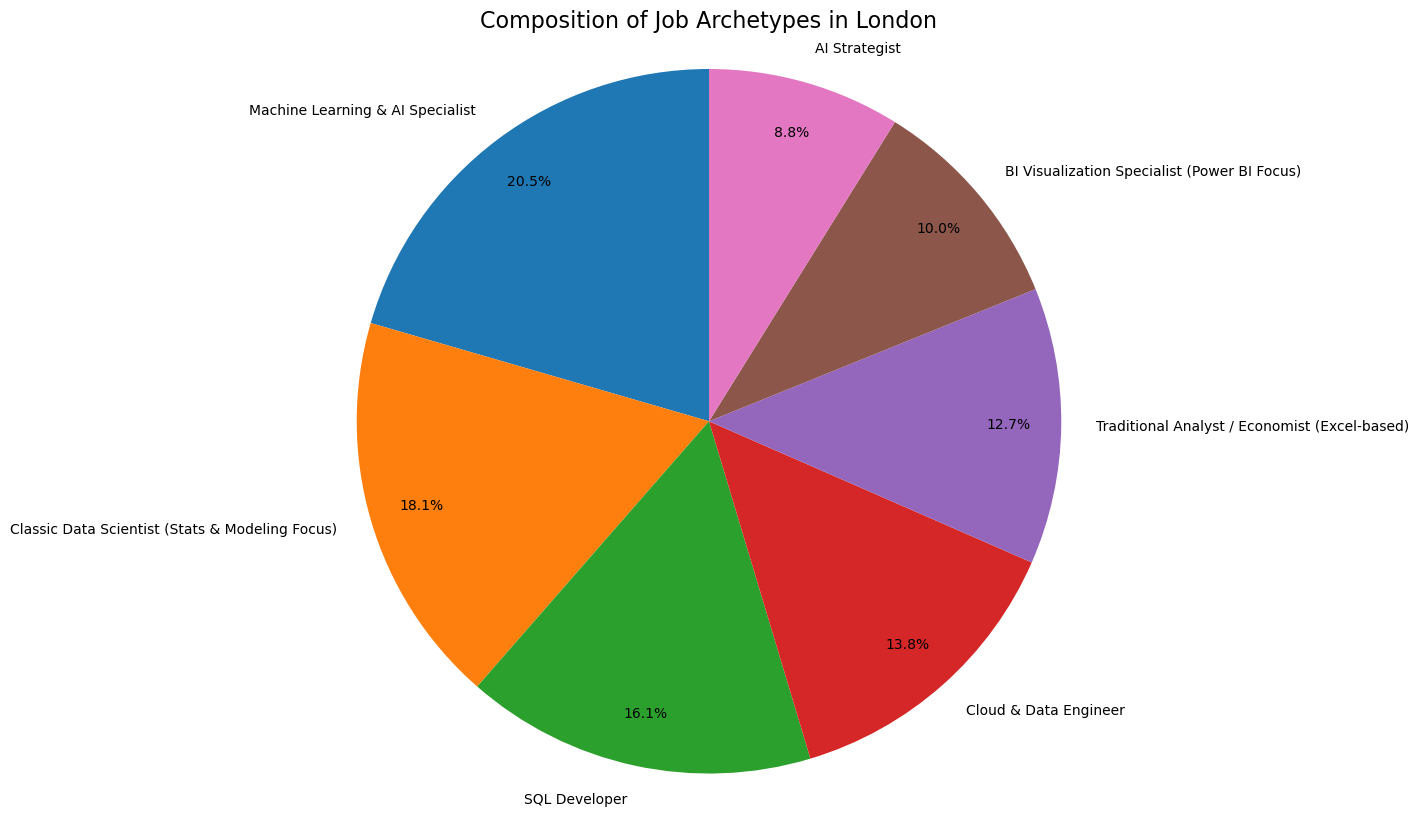

In [24]:
import matplotlib.pyplot as plt

# Create DataFrame for London only
df_london = df[df['region'] == 'London'].copy()

# Calculate value counts for job archetypes in London
london_archetype_counts = df_london['kmeans_job_archetype'].value_counts()

# Optional: Filter out 'Noise'
if 'Noise / General Business Role' in london_archetype_counts.index:
    london_archetype_counts = london_archetype_counts.drop(labels='Noise / General Business Role')

# Convert counts to proportions
london_archetype_proportions = london_archetype_counts / london_archetype_counts.sum()

# Define a dictionary to map archetypes to specific colors
# This is a more robust approach than hardcoding a list
color_map = {
    'Machine Learning & AI Specialist': 'tab:blue',
    'Classic Data Scientist (Stats & Modeling Focus)': 'tab:orange',
    'SQL Developer': 'tab:green',
    'Cloud & Data Engineer': 'tab:red',
    'Traditional Analyst / Economist (Excel-based)': 'tab:purple',
    'BI Visualization Specialist (Power BI Focus)': 'tab:brown',
    'AI Strategist': 'tab:pink'
}

# Create a list of colors in the correct order based on the proportions
pie_colors = [color_map[label] for label in london_archetype_proportions.index]

# Plotting the pie chart with the new colors
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    london_archetype_proportions,
    labels=london_archetype_proportions.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=pie_colors  # Pass the list of colors here
)

plt.title('Composition of Job Archetypes in London', fontsize=16)
plt.axis('equal')
plt.show()


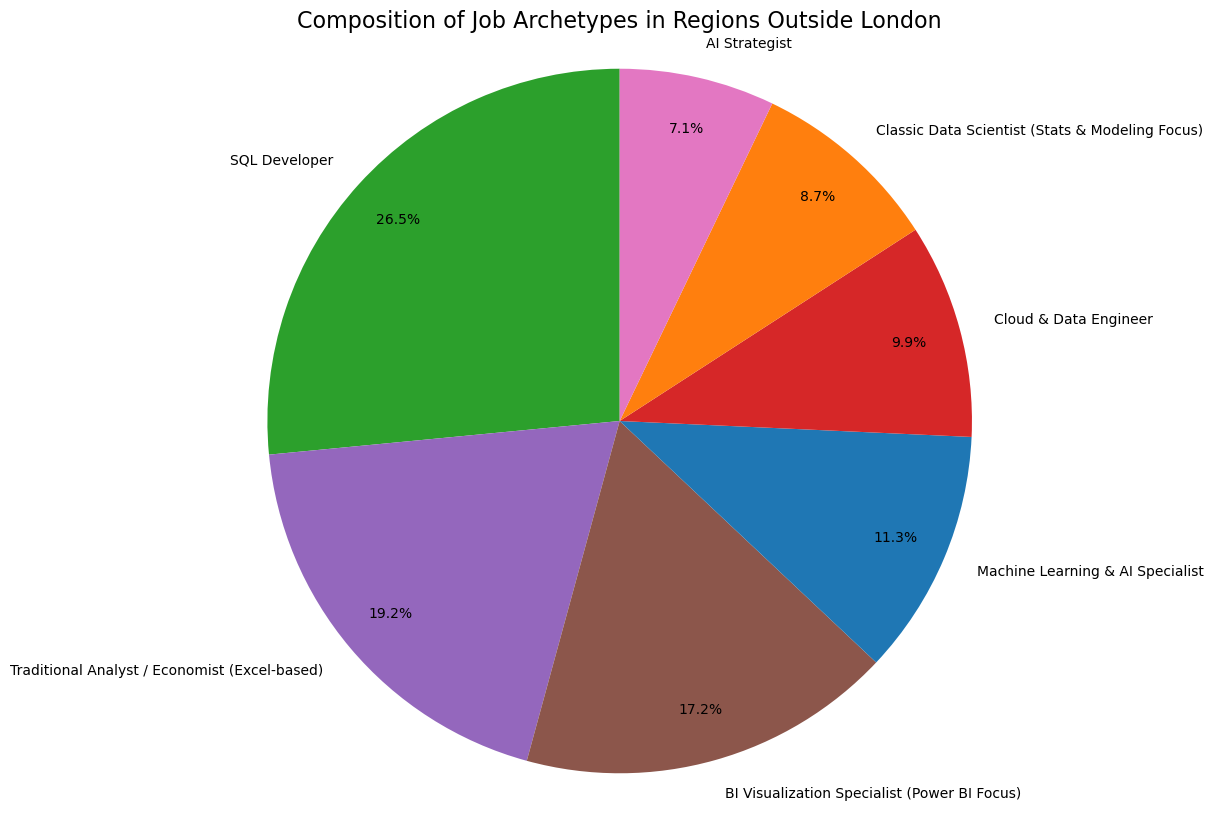

In [27]:
# Filter the DataFrame to exclude 'London' and 'Remote' regions
# and also exclude the 'Noise / General Business Role' archetype
filtered_df = df[~df['region'].isin(['London', 'Remote']) & (df['kmeans_job_archetype'] != 'Noise / General Business Role')]

# Calculate value counts for job archetypes in the filtered data
non_london_remote_archetype_counts = filtered_df['kmeans_job_archetype'].value_counts()

# Convert counts to proportions
non_london_remote_archetype_proportions = non_london_remote_archetype_counts / non_london_remote_archetype_counts.sum()

# Create a list of colors in the correct order based on the proportions
pie_colors_non = [color_map[label] for label in non_london_remote_archetype_proportions.index]

# Plotting the pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    non_london_remote_archetype_proportions,
    labels=non_london_remote_archetype_proportions.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=pie_colors_non
)

plt.title('Composition of Job Archetypes in Regions Outside London', fontsize=16)
plt.axis('equal')
plt.show()

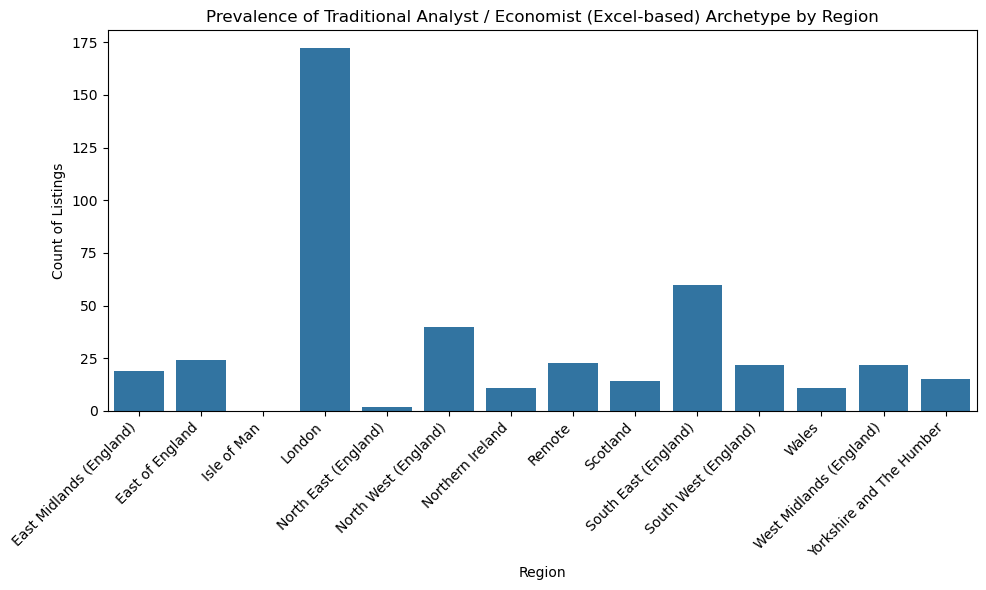

In [30]:
# Option 2: Individual Bar Charts (if you want to compare specific archetype counts across regions)
# For example, to compare 'Machine Learning & AI Specialist' archetype across regions:
plt.figure(figsize=(10, 6))
sns.barplot(x=archetype_regional_counts.index, y=archetype_regional_counts['Traditional Analyst / Economist (Excel-based)'])
plt.title('Prevalence of Traditional Analyst / Economist (Excel-based) Archetype by Region')
plt.xlabel('Region')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Separate London vs Rest of UK*

*Step 3: Analyze Prevalence of "Super-Skills" by Region*

In [31]:
#Super-Skill column names
super_skill_columns = [
    'SuperSkill_Basic_Data_Science',
    'SuperSkill_BI_DataViz',
    'SuperSkill_Statistical_Analysis_Reporting',
    'SuperSkill_Cloud-Enabled_AI_BI',
    'SuperSkill_SQL_Analytics_&_Automation',
    'SuperSkill_AI_Cloud_Excel',
    'SuperSkill_Cloud_Augmented_Analysis',
    'SuperSkill_Cloud_Analytics_Econometrics',
    'SuperSkill_Python_Data_Products',
    'SuperSkill_Cloud_Engineering_MLOps',
    'SuperSkill_BI_&_DataViz',
    'SuperSkill_R_StatScience_&_BI'
]
#Calculate the average "score" or presence of each super-skill per region
super_skill_regional_means = df.groupby('region')[super_skill_columns].mean()

print("\nAverage Super-Skill Presence/Intensity by Region:")
print(super_skill_regional_means)


Average Super-Skill Presence/Intensity by Region:
                          SuperSkill_Basic_Data_Science  \
region                                                    
East Midlands (England)                       -0.102960   
East of England                               -0.044503   
Isle of Man                                   -0.594345   
London                                         0.095806   
North East (England)                          -0.046166   
North West (England)                          -0.064852   
Northern Ireland                               0.004423   
Remote                                        -0.135040   
Scotland                                      -0.066034   
South East (England)                          -0.039787   
South West (England)                          -0.079256   
Wales                                         -0.190091   
West Midlands (England)                       -0.091055   
Yorkshire and The Humber                      -0.202317   

    

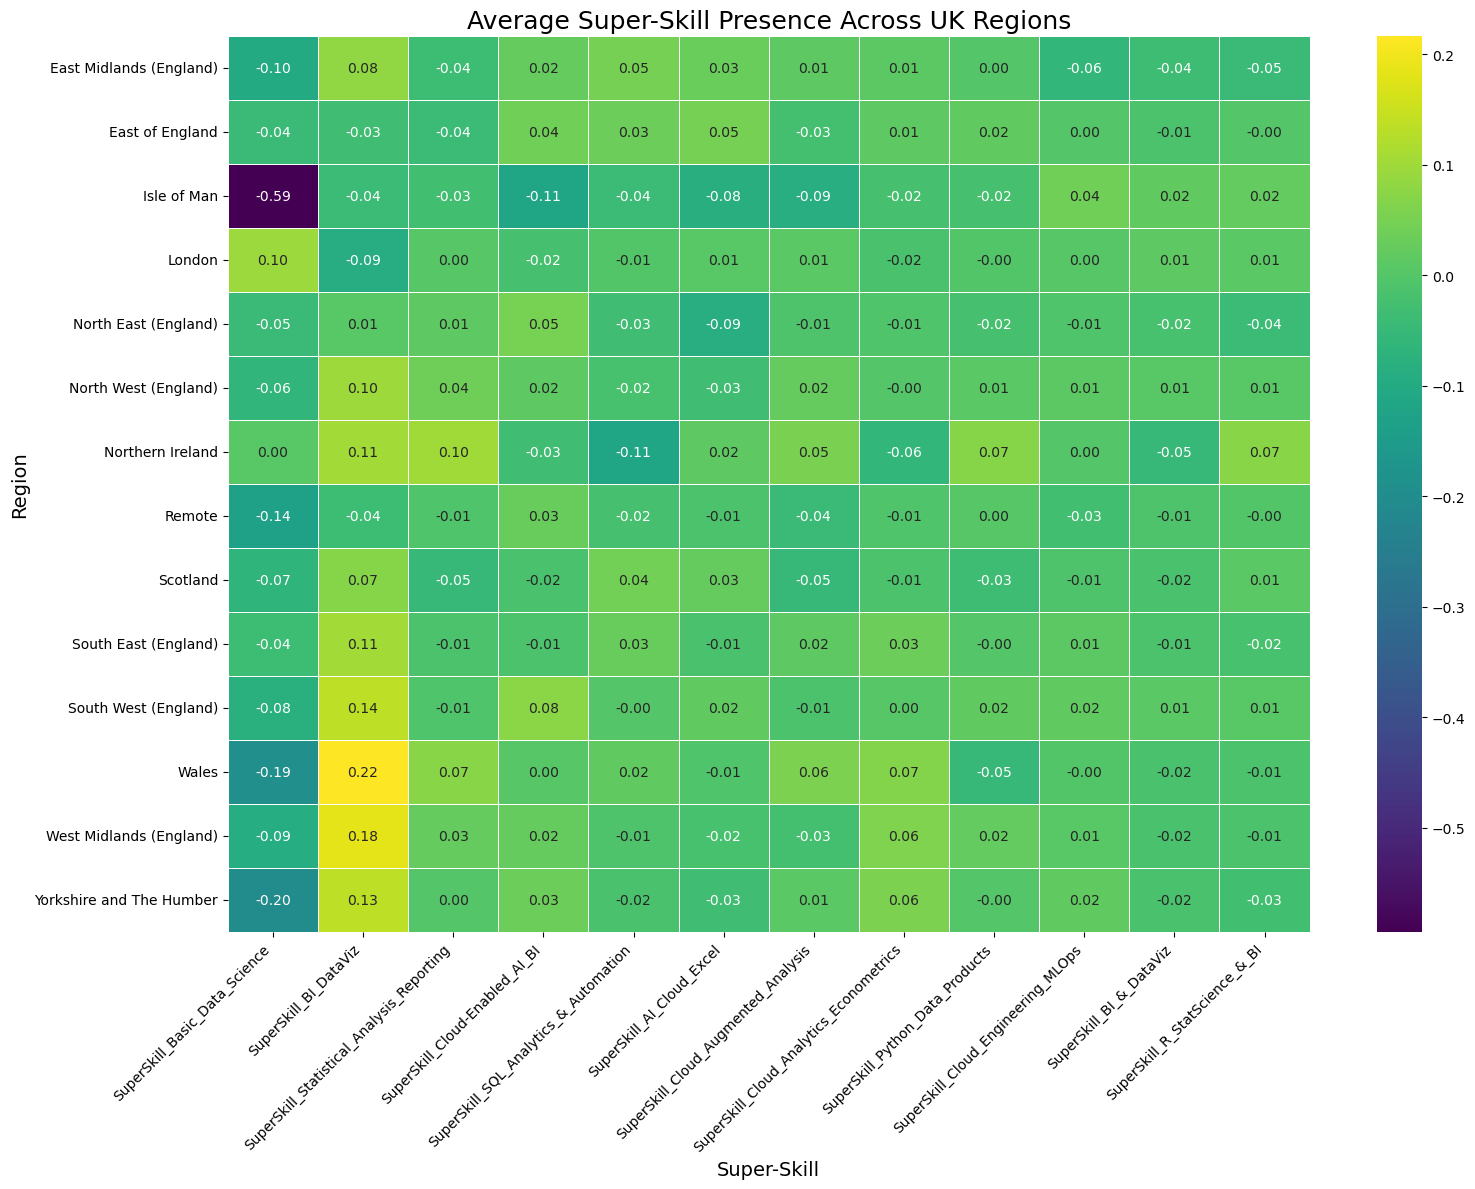

In [32]:
plt.figure(figsize=(16, 12)) # Adjusted size for more columns
sns.heatmap(
    super_skill_regional_means,
    annot=True,      # Show the numerical values on the heatmap
    cmap='viridis',  # Color map (you can try 'YlGnBu', 'coolwarm', etc.)
    fmt=".2f",       # Format the annotations to two decimal places
    linewidths=.5    # Add lines between cells for better separation
)
plt.title('Average Super-Skill Presence Across UK Regions', fontsize=18)
plt.xlabel('Super-Skill', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for readability
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('average_super_skill_presence_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [34]:
# Group by region and job archetype
# Note: This is an aggregation of the existing median salary column
median_salaries = df.groupby(['region', 'kmeans_job_archetype'])['median_annual_salary_gbp'].median().reset_index()

# Display the first few rows of the result
print("Median Annual Salary by Region and Job Archetype:")
print(median_salaries.head())

Median Annual Salary by Region and Job Archetype:
                    region                             kmeans_job_archetype  \
0  East Midlands (England)                                    AI Strategist   
1  East Midlands (England)     BI Visualization Specialist (Power BI Focus)   
2  East Midlands (England)  Classic Data Scientist (Stats & Modeling Focus)   
3  East Midlands (England)                            Cloud & Data Engineer   
4  East Midlands (England)                 Machine Learning & AI Specialist   

   median_annual_salary_gbp  
0                   55000.0  
1                   51250.0  
2                   55000.0  
3                   57500.0  
4                   49000.0  


C:\Users\zo24176\AppData\Local\Temp\ipykernel_6632\3206049143.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  median_salary_pivot.applymap(lambda x: f'£{int(x)}' if pd.notna(x) else '') +


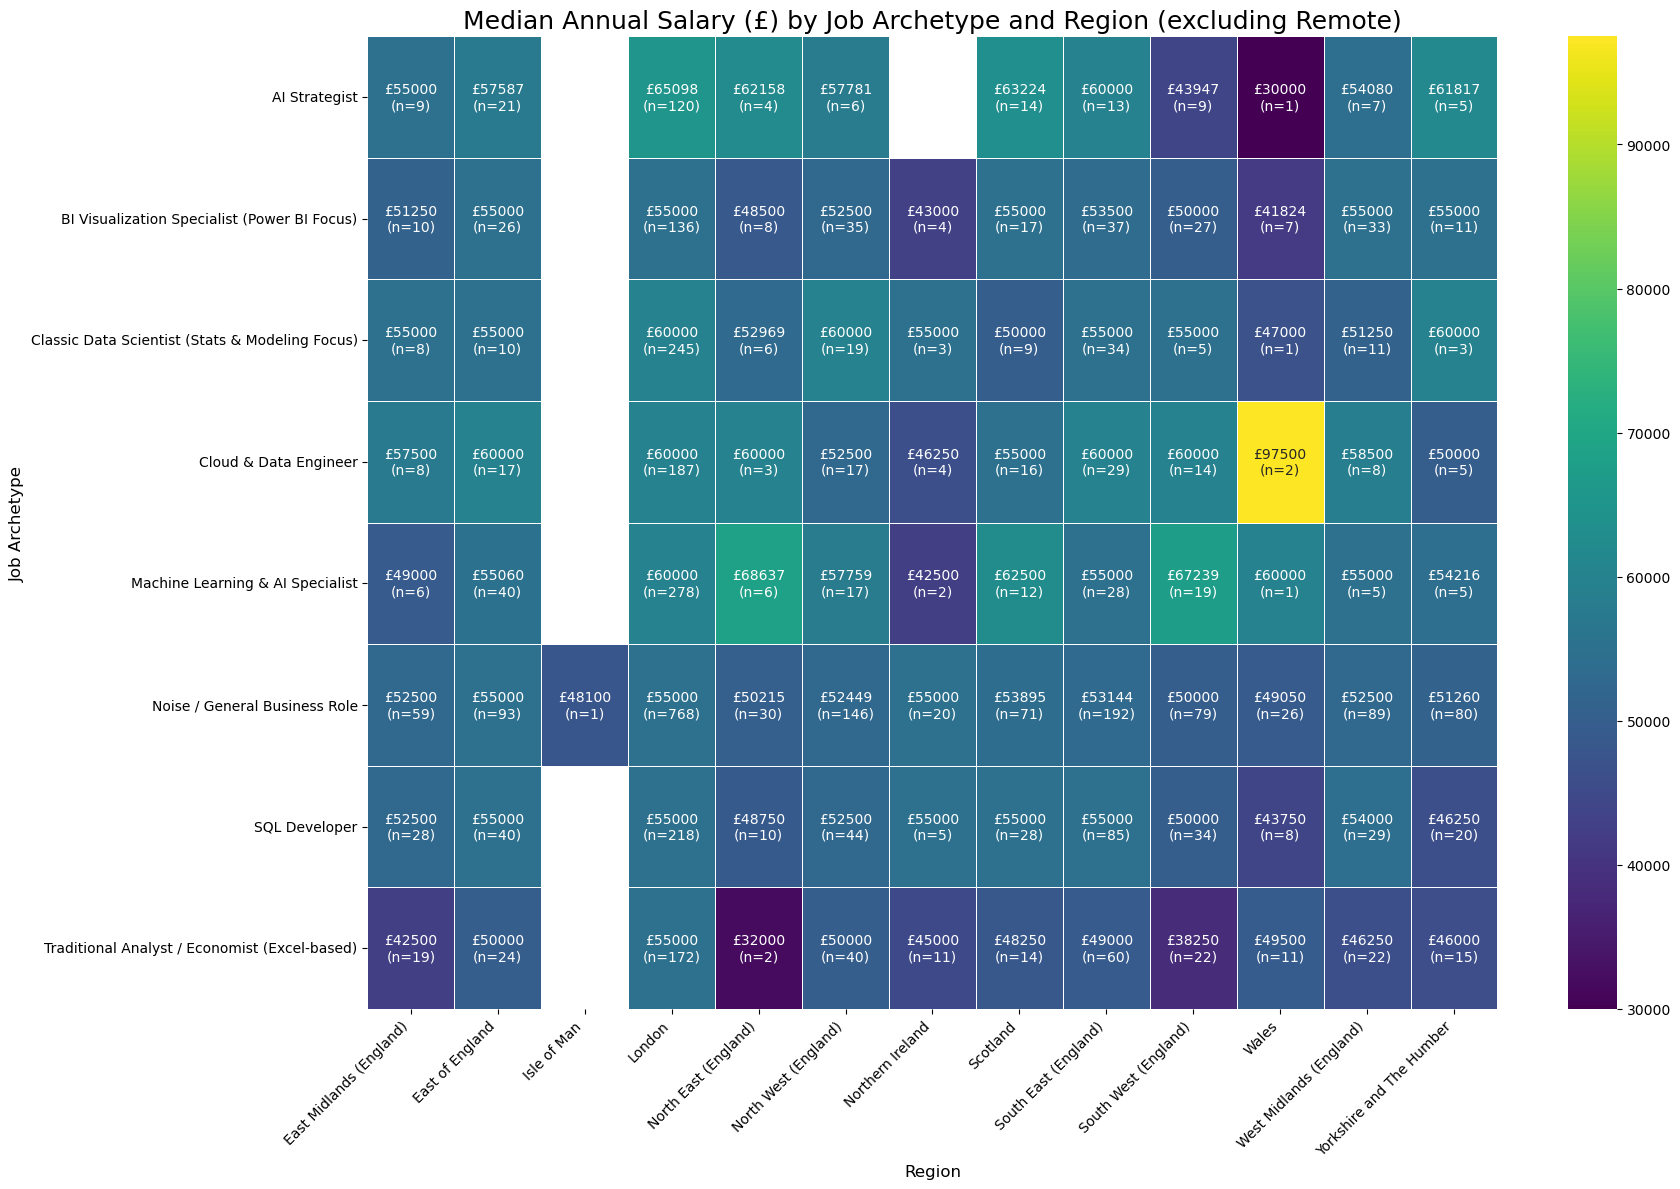

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'region' column to string type to ensure .str.contains works correctly
df['region'] = df['region'].astype(str)
# Filter out rows where the 'region' contains 'remote' (case-insensitive)
df_filtered = df[~df['region'].str.contains('remote', case=False, na=False)].copy()

# 1. Group the data to get both the count and the median salary from the FILTERED DataFrame
aggregated_data = df_filtered.groupby(['region', 'kmeans_job_archetype']).agg(
    median_salary=('median_annual_salary_gbp', 'median'),
    count=('median_annual_salary_gbp', 'count')
).reset_index()

# 2. Reshape the data for the heatmap
median_salary_pivot = aggregated_data.pivot_table(
    index='kmeans_job_archetype',
    columns='region',
    values='median_salary'
)

# Reshape the count data for a secondary annotation layer
count_pivot = aggregated_data.pivot_table(
    index='kmeans_job_archetype',
    columns='region',
    values='count'
)

# 3. Create the heatmap annotations
# We combine the median salary and the count into a single string for each cell
heatmap_labels = (
    median_salary_pivot.applymap(lambda x: f'£{int(x)}' if pd.notna(x) else '') +
    '\n(n=' + count_pivot.fillna(0).astype(int).astype(str) + ')'
)

# 4. Plot the heatmap with combined annotations
plt.figure(figsize=(18, 12))
sns.heatmap(
    median_salary_pivot,
    cmap='viridis',
    annot=heatmap_labels,  # Use the new combined labels
    fmt='',                # Set fmt to an empty string since we are providing pre-formatted labels
    linewidths=.5,
    linecolor='white'
)

plt.title('Median Annual Salary (£) by Job Archetype and Region (excluding Remote)', fontsize=18)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Job Archetype', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\zo24176\AppData\Local\Temp\ipykernel_6632\384629278.py:40: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  median_salary_pivot.applymap(lambda x: f'£{int(x)}' if pd.notna(x) else '') +


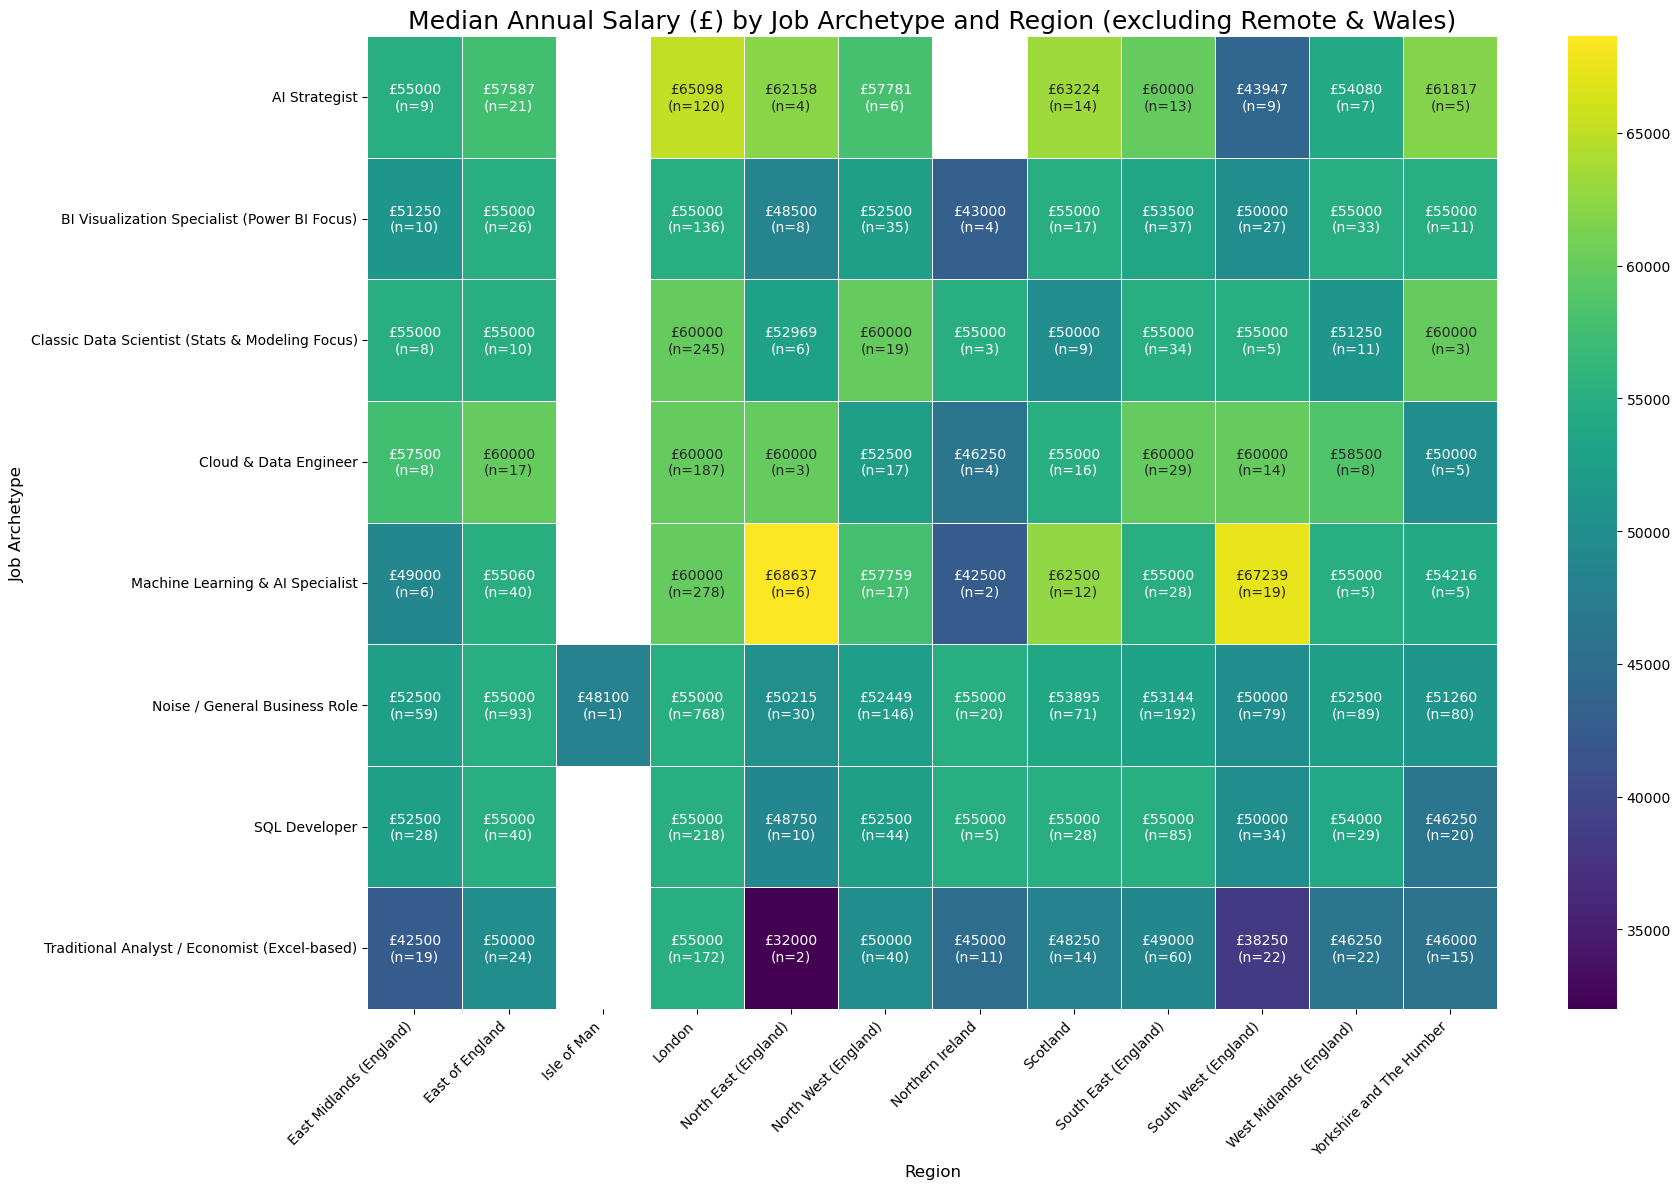

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your initial DataFrame with 'region', 'kmeans_job_archetype', and 'median_annual_salary_gbp'

# --- NEW STEP: Filter out 'remote' and 'wales' regions ---
# Convert 'region' column to string type to ensure .str.contains works correctly
df['region'] = df['region'].astype(str)
# Filter out rows where the 'region' contains 'remote' (case-insensitive) OR 'wales' (case-insensitive)
# The '&' operator means BOTH conditions must be true for a row to be kept
df_filtered = df[
    (~df['region'].str.contains('remote', case=False, na=False)) &
    (~df['region'].str.contains('wales', case=False, na=False))
].copy()

# 1. Group the data to get both the count and the median salary from the FILTERED DataFrame
aggregated_data = df_filtered.groupby(['region', 'kmeans_job_archetype']).agg(
    median_salary=('median_annual_salary_gbp', 'median'),
    count=('median_annual_salary_gbp', 'count')
).reset_index()

# 2. Reshape the data for the heatmap
median_salary_pivot = aggregated_data.pivot_table(
    index='kmeans_job_archetype',
    columns='region',
    values='median_salary'
)

# Reshape the count data for a secondary annotation layer
count_pivot = aggregated_data.pivot_table(
    index='kmeans_job_archetype',
    columns='region',
    values='count'
)

# 3. Create the heatmap annotations
# We combine the median salary and the count into a single string for each cell
heatmap_labels = (
    median_salary_pivot.applymap(lambda x: f'£{int(x)}' if pd.notna(x) else '') +
    '\n(n=' + count_pivot.fillna(0).astype(int).astype(str) + ')'
)

# 4. Plot the heatmap with combined annotations
plt.figure(figsize=(18, 12))
sns.heatmap(
    median_salary_pivot,
    cmap='viridis',
    annot=heatmap_labels,  # Use the new combined labels
    fmt='',                # Set fmt to an empty string since we are providing pre-formatted labels
    linewidths=.5,
    linecolor='white'
)

plt.title('Median Annual Salary (£) by Job Archetype and Region (excluding Remote & Wales)', fontsize=18)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Job Archetype', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
